# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
pn.extension('plotly')


import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file /Users/brianwetzel/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/brianwetzel/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/brianwetzel/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  #

In [2]:
# Read the Mapbox API key
load_dotenv("../../api_keys/api_keys.env")
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 

sfo_data_avg_units_annual = sfo_data["housing_units"].groupby("year").mean()
sfo_data_avg_units_annual.head()


year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [5]:
# Max, Min, Std

max_value = sfo_data_avg_units_annual.max()
min_value = sfo_data_avg_units_annual.min()
std_value = sfo_data_avg_units_annual.std()
print(f"Maximum = {max_value}\nMinimum = {min_value}\nStandard Deviation = {std_value}")

Maximum = 384242
Minimum = 372560
Standard Deviation = 4206.0007132667015


In [6]:
# Save the dataframe as a csv file
sfo_data_avg_units_annual.to_csv('sfo_data_avg_units_annual.csv')

(368353.9992867333, 388448.0007132667)

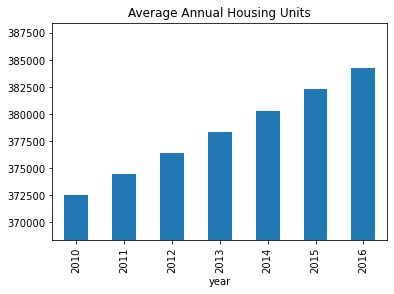

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
sfo_data_avg_units_annual.plot.bar(title= "Average Annual Housing Units")


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
plt.ylim(min_value-std_value, max_value+std_value)

In [41]:
# Same solution but with hvplot

sfo_data_avg_units_annual = sfo_data.groupby("year").mean(["housing_units"])
sfo_data_avg_units_annual.drop(columns=["sale_price_sqr_foot", "gross_rent"], inplace=True)
sfo_data_avg_units_annual.hvplot(kind="bar", title= "Average Annual Housing Units", ylim=[370000,387500]).opts(yformatter='%.0f', color='k')




:Bars   [year]   (housing_units)

- - - 




## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [9]:
# Calculate the average sale price per square foot and average gross rent
sfo_data_avg_costs_annual = sfo_data.groupby("year").mean().drop(columns=["housing_units"])
sfo_data_avg_costs_annual.columns = ["average_sale_price_sqr_foot", "average_gross_rent"]
sfo_data_avg_costs_annual.head()

,average_sale_price_sqr_foot,average_gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


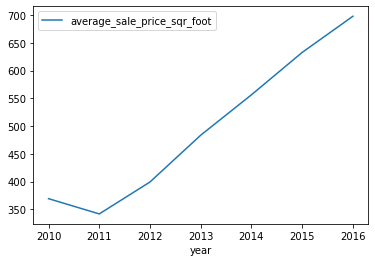

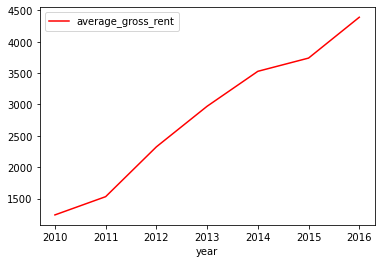

In [30]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sfo_data_avg_price_annual = sfo_data_avg_costs_annual.drop(columns=["average_gross_rent"]).plot()


# Line chart for average montly rent
sfo_data_avg_rent_annual = sfo_data_avg_costs_annual.drop(columns=["average_sale_price_sqr_foot"]).plot(color="red")


In [33]:
#SAME SOLUTION BUT WITH HVPLOT
sfo_data_avg_costs_annual.drop(columns=["average_gross_rent"]).hvplot(title="Average Sale Price per Square Foot")


:Curve   [year]   (average_sale_price_sqr_foot)

In [32]:
#SAME SOLUTION BUT WITH HVPLOT
sfo_data_avg_costs_annual.drop(columns=["average_sale_price_sqr_foot"]).hvplot(color="red", title="Average Monthly Rent")


:Curve   [year]   (average_gross_rent)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [42]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sf_sales = sfo_data.groupby(["year", "neighborhood"]).mean().reset_index()
sf_sales.head()



,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [12]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

sf_sales.hvplot.line(    
    x="year",
    y="sale_price_sqr_foot",
    width=600,
    height=500,
    groupby= "neighborhood",
    xlabel="Years",
    ylabel="Average price per sq ft",
    grid=True,
    title="SF Average Price per Square Ft by Neighborhood"
    )

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [14]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood

sf_sales.hvplot.line(    
    x="year",
    y="gross_rent",
    width=800,
    height=400,
    groupby= "neighborhood",
    xlabel="Years",
    ylabel="Average Gross Rent",
    grid=True,
    title="SF Average Gross Rent by Neighborhood"
    )

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [15]:
# Getting the data from the top 10 expensive neighborhoods to own
top_ten_most_expensive = sf_sales.groupby(["neighborhood"]).mean()
top_ten_most_expensive = top_ten_most_expensive.sort_values(["sale_price_sqr_foot"], ascending=False).head(10).reset_index()
top_ten_most_expensive.drop(columns=["year"])



,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [16]:
# Plotting the data from the top 10 expensive neighborhoods

top_ten_most_expensive.hvplot.bar(
    y="sale_price_sqr_foot",
    x="neighborhood",
    title="Top 10 Most Expensive Neighborhoods in SFO",
    rot=90,
    width=600,
    height=400,
    ylim=[625,925]
)


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [17]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
sf_sales.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [18]:
# Plotting the data from the top 10 expensive neighborhoods
top_ten_comparison = sf_sales.sort_values(["sale_price_sqr_foot"], ascending=False)

top_ten_comparison.hvplot.bar(
    "year", ["gross_rent", "sale_price_sqr_foot"],
    title="Top 10 Most Expensive Neighborhoods in SFO",
    groupby= "neighborhood",
    ylabel="Cost ($)",
    xlabel="Year",
    rot=90,
    width=600,
    height=400,
    ylim=[0,4000]

)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [19]:
# Load neighborhoods coordinates data

neighborhood_coordinates_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_coordinates = pd.read_csv(neighborhood_coordinates_path)
neighborhood_coordinates.head()


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [20]:
# Calculate the mean values for each neighborhood
sfo_data_no_year = sfo_data.reset_index().drop(columns=["year"])
# sfo_data_no_year.head()

sfo_neighborhood_mean = sfo_data_no_year.groupby("neighborhood").mean().reset_index()
sfo_neighborhood_mean.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [21]:
# Join the average values with the neighborhood locations

sfo_data_combined = pd.concat([sfo_neighborhood_mean, neighborhood_coordinates], axis='columns', join='inner').drop(columns=["Neighborhood"])
sfo_data_combined.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,37.728630,-122.443050


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

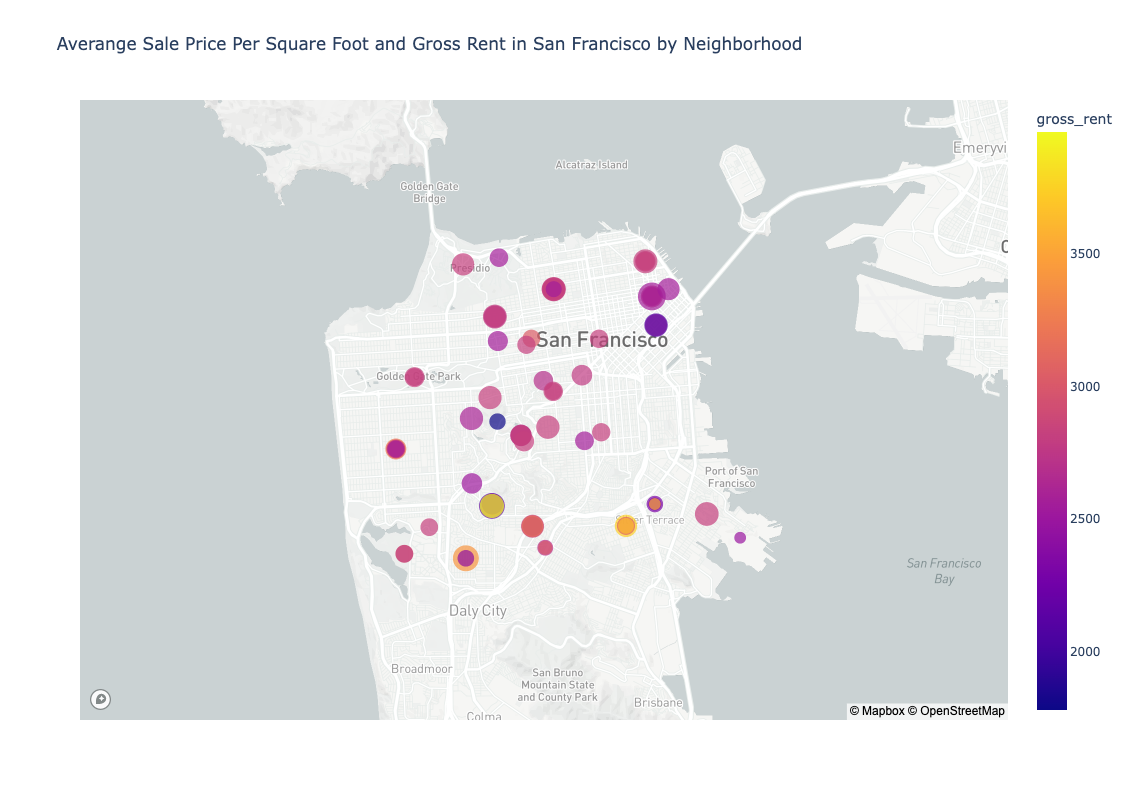

In [45]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    sfo_data_combined,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    hover_name="neighborhood",
    title="Averange Sale Price Per Square Foot and Gross Rent in San Francisco by Neighborhood",
    zoom=11,
    height=800
)

map_plot.show()


- - -

- - -

- - -

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [23]:
# Fetch the data from all expensive neighborhoods per year.


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [24]:
# Parallel Categories Plot
# YOUR CODE HERE!

In [25]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [26]:
# Sunburst Plot
# YOUR CODE HERE!